### A1. Question for Analysis
Q: Does Tenure have an impact on customer churn rates?

### A2. Benefit From Analysis
Knowing how tenure affects churn rates would help in the development of strategies to keep customers using the company's services. If customers are more likely to leave in the first six months of service, then stakeholders would know they need to provide more benefits/discounts during that time compared to customers that have been with them longer.

### A3. Data Identification
Tenure: This variable measures the length of time a customer has been with the company. It is continuous, and is stored as a float.

Churn: This is a categorical variable that records "Yes" or "No" to whether or not a customer is staying with the company. That makes it one of the most important variables in the data set because it directly correlates with profitability.


### B1. Code

In [1]:
#Read in the data set
df <- read.csv(file = "C:/Users/Conner/OneDrive/WGU/D207/Data set/churn_clean.csv")

In [2]:
#Load relevant libraries
library(ggplot2)
library(DescTools)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'DescTools' was built under R version 3.6.3"

In [4]:
#Create a 0/1 column for churn answers [1]
churn_col <- ifelse(df$Churn == "Yes", 1, 0)

In [5]:
#Execute t-test between churn and tenure variables (Bruce, Peter, et al. 2020)
t <- df[churn_col == 1, 'Tenure']
f <- df[churn_col == 0, 'Tenure']
t.test(t, f)


	Welch Two Sample t-test

data:  t and f
t = -68.826, df = 7602.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29.91485 -28.25800
sample estimates:
mean of x mean of y 
 13.14767  42.23409 


### B2. Output
Welch Two Sample t-test

data:  t and f

t = -68.826, df = 7602.3, p-value < 2.2e-16

alternative hypothesis: true difference in means is not equal to 0

95 percent confidence interval:

 -29.91485 -28.25800
 
sample estimates:

mean of x mean of y 

 13.14767  42.23409

### B3. Justification
Using the t-test for this specific analysis was the best choice because of the number of variables being analyzed and their data types. A t-test is the best choice for comparing only two variables, as opposed to many. Additionally, one of those types is categorical, with only two options (True/False), and the other is numerical. The result of the t-test, the calculated p-value shown above, shows the strength of the relationship of the two variables. This helps directly answer the question in section A1.  

### C. Univariate Statistics

In [6]:
#Continuous variable (Bruce, Peter, et al. 2020)
#Summarize the data and create a frequency table
summary(df$Tenure)
breaks <- seq(from=min(df[['Tenure']]), to=max(df[['Tenure']]), length = 11)
tenure_freq <- cut(df[['Tenure']], breaks = breaks, right = TRUE, include.lowest = TRUE)
table(tenure_freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   7.918  35.431  34.526  61.480  71.999 

tenure_freq
    [1,8.1]  (8.1,15.2] (15.2,22.3] (22.3,29.4] (29.4,36.5] (36.5,43.6] 
       2560        1634         636         146          32         239 
(43.6,50.7] (50.7,57.8] (57.8,64.9]   (64.9,72] 
        583         969        1465        1736 

From these summary statistics you can see that while the median and mean of the column falls around 35, there is actually a bimodal distribution of the data. By looking at the frequency table it appears that the majority of values falls into two larger clumps near either end of the distribution. 

In [7]:
#Categorical variable
summary(df$Churn)

No  Yes 
7350 2650

Churn skews heavily towards "No", with it being 73.5% of the values while "Yes" is 26.5%. 

In [8]:
#Continuous variable
#Summarize the data and create a frequency table
summary(df$Income)
inc_breaks <- seq(from=min(df[['Income']]), to=max(df[['Income']]), length = 11)
income_freq <- cut(df[['Income']], breaks = inc_breaks, right = TRUE, include.lowest = TRUE)
table(income_freq)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   348.7  19224.7  33170.6  39806.9  53246.2 258900.7 

income_freq
     [349,2.62e+04] (2.62e+04,5.21e+04] (5.21e+04,7.79e+04] (7.79e+04,1.04e+05] 
               3822                3560                1624                 657 
 (1.04e+05,1.3e+05]  (1.3e+05,1.55e+05] (1.55e+05,1.81e+05] (1.81e+05,2.07e+05] 
                220                  81                  26                   5 
(2.07e+05,2.33e+05] (2.33e+05,2.59e+05] 
                  3                   2 

The income distribution appears heavily skewed towards the lower end, with most of the values falling into the first 3 bins. 

In [9]:
#Categorical variable
#Summarize the data
summary(df$Gender)

Female      Male Nonbinary 
     5025      4744       231

There is a fairly equal distribution between genders, with Males at 47.44% coming up just below Females at 50.25%. Nonbinary makes up a very small percentage at around 2.31%.

### C1. Visual of Findings

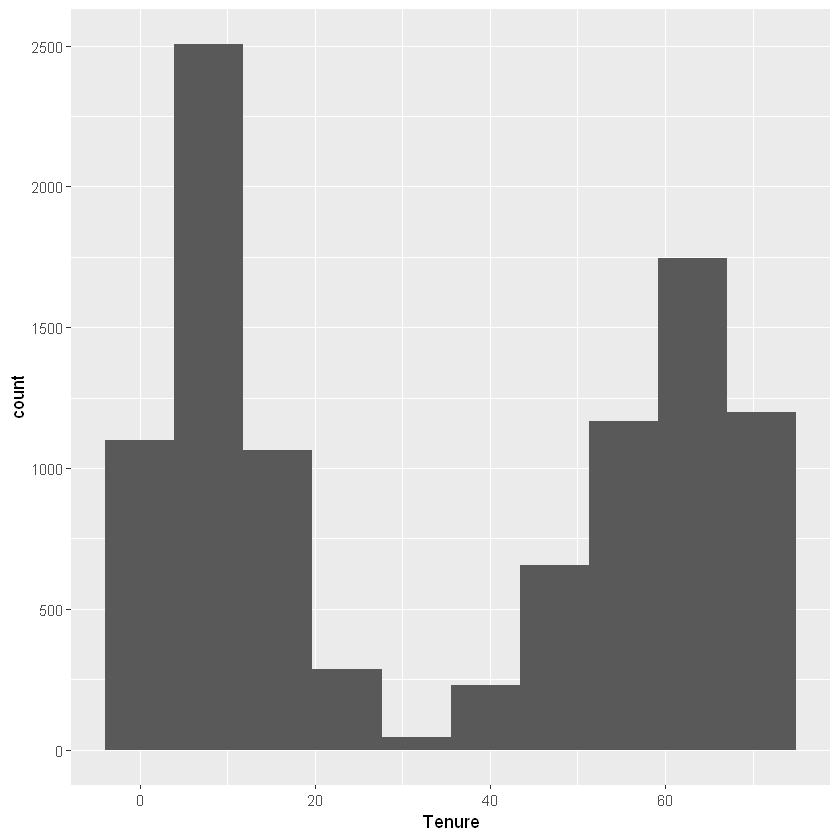

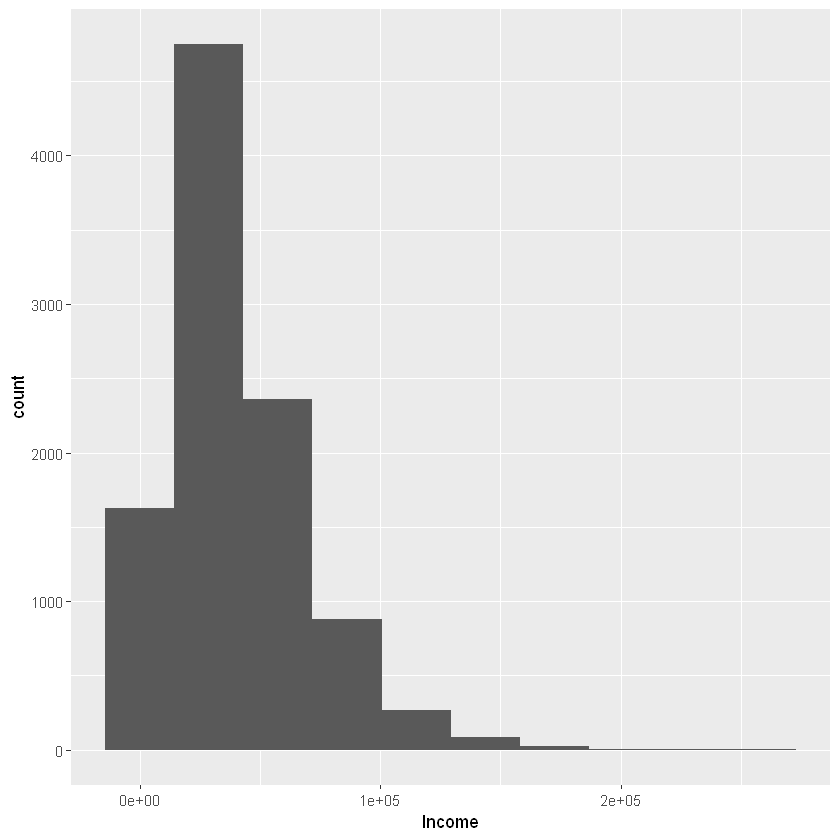

In [10]:
#Display distributions of both continuous variables [3]
#Tenure
tenure_hist <- ggplot(df, aes(x = Tenure)) + geom_histogram(bins = 10)
#Income
income_hist <- ggplot(df, aes(x = Income)) + geom_histogram(bins = 10)
tenure_hist
income_hist

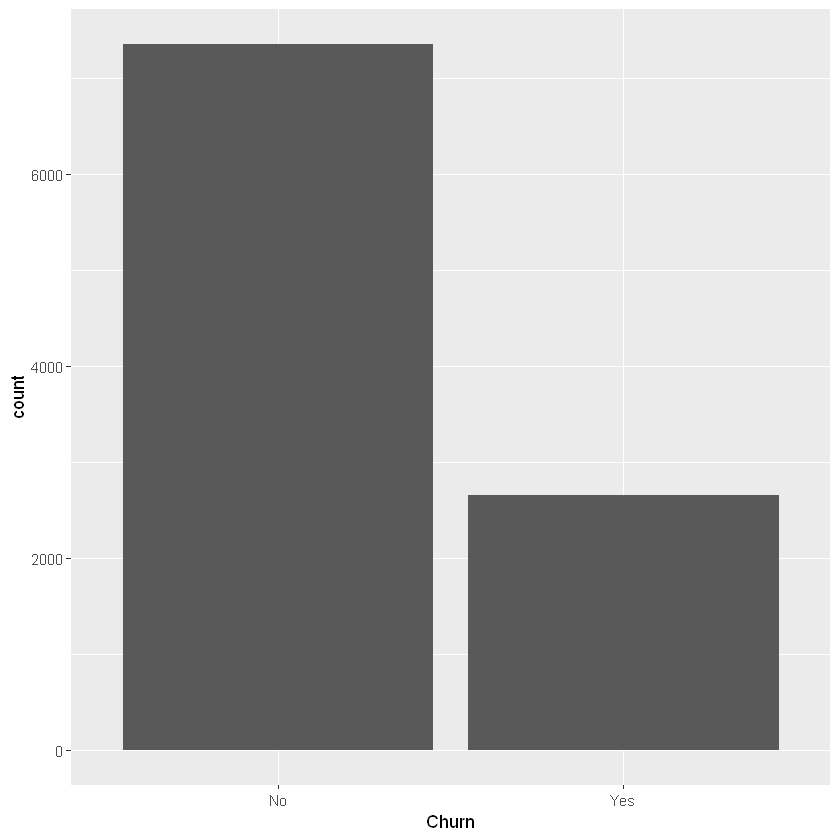

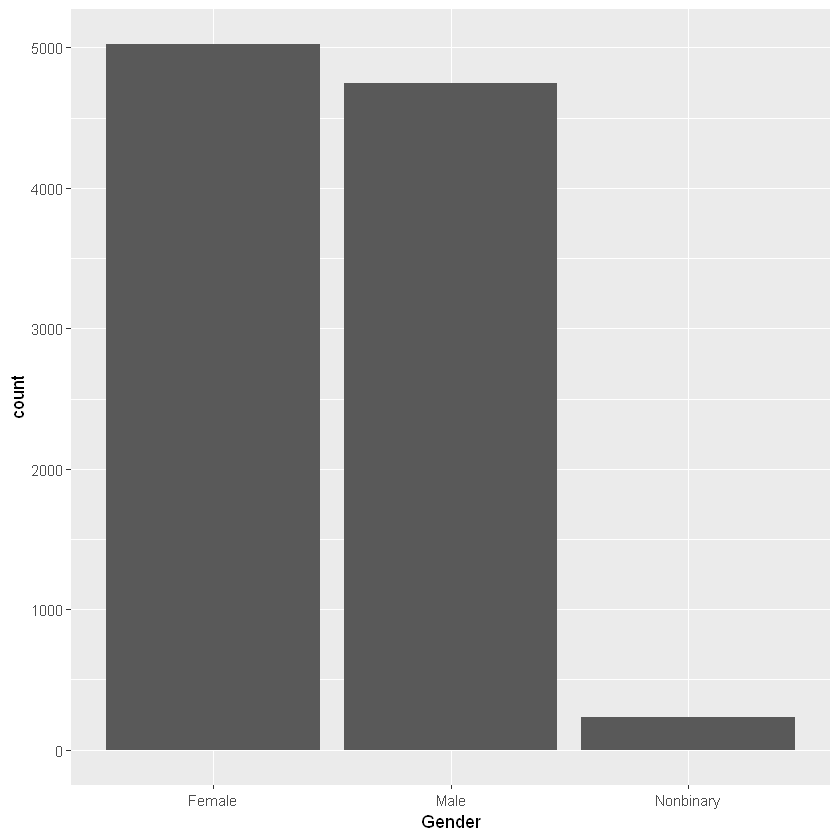

In [11]:
#Display distributions of categorical variables [3]
#Churn
churn_hist <- ggplot(df, aes(x = Churn)) + geom_bar()
#Gender
gender_hist <- ggplot(df, aes(x = Gender)) + geom_bar()
churn_hist
gender_hist

### D. Bivariate Statistics & D1. Visual of Findings

------------------------------------------------------------------------------ 
Tenure and Churn Frequency Distribution

Summary: 
n pairs: 10'000, valid: 10'000 (100.0%), missings: 0 (0.0%), groups: 2

                        
             No      Yes
mean     42.234   13.148
median   53.774    7.874
sd       25.292   15.577
IQR      51.754    9.689
n         7'350    2'650
np      73.500%  26.500%
NAs           0        0
0s            0        0

Kruskal-Wallis rank sum test:
  Kruskal-Wallis chi-squared = 2196, df = 1, p-value < 2.2e-16




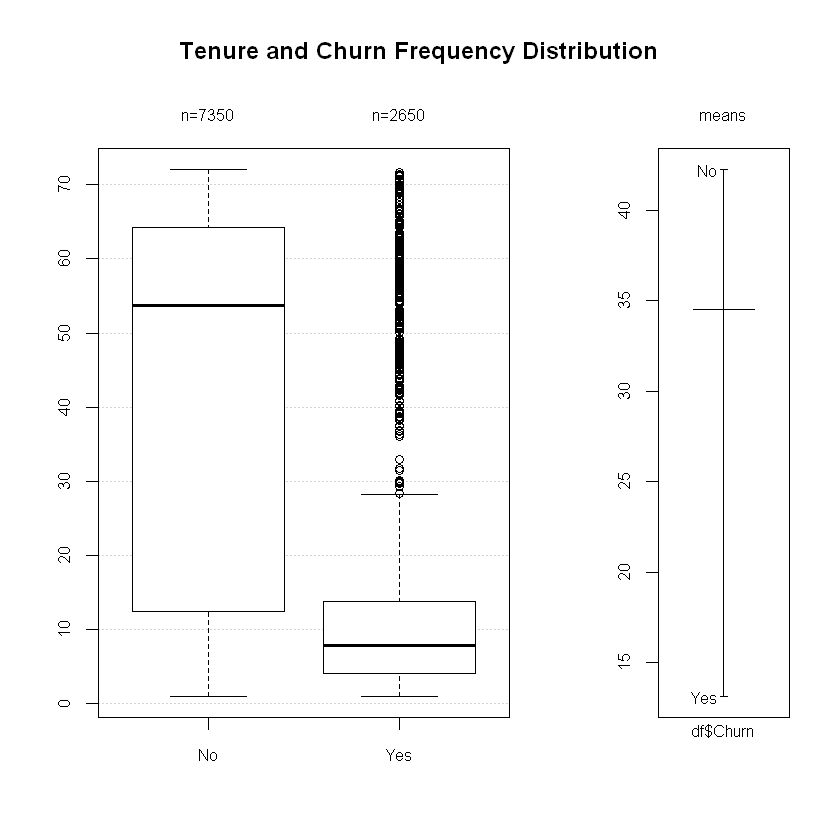

In [6]:
#Churn and tenure distribution [2]
Desc(df$Tenure ~ df$Churn, main = "Tenure and Churn Frequency Distribution", nolabel = FALSE)

There are clear distinctions in the distributions of churn as it relates to tenure. The majority (inner quartile range) of "yes" falls below 12 months, while "no" is largely above that. 

------------------------------------------------------------------------------ 
df$Gender ~ df$Income

Summary: 
n pairs: 10'000, valid: 10'000 (100.0%), missings: 0 (0.0%), groups: 3

                                          
            Female        Male   Nonbinary
mean    40'422.679  39'098.450  40'962.162
median  33'883.790  32'393.240  33'203.620
sd      28'341.798  27'920.534  30'500.332
IQR     35'166.900  32'636.603  34'179.405
n            5'025       4'744         231
np         50.250%     47.440%      2.310%
NAs              0           0           0
0s               0           0           0

Kruskal-Wallis rank sum test:
  Kruskal-Wallis chi-squared = 5.8727, df = 2, p-value = 0.05306





Proportions of df$Gender in the quantiles of df$Income:
           
                 Q1      Q2      Q3      Q4
  Female      49.6%   48.8%   50.2%   52.5%
  Male        48.2%   48.8%   47.8%   44.9%
  Nonbinary    2.2%    2.4%    2.0%    2.6%


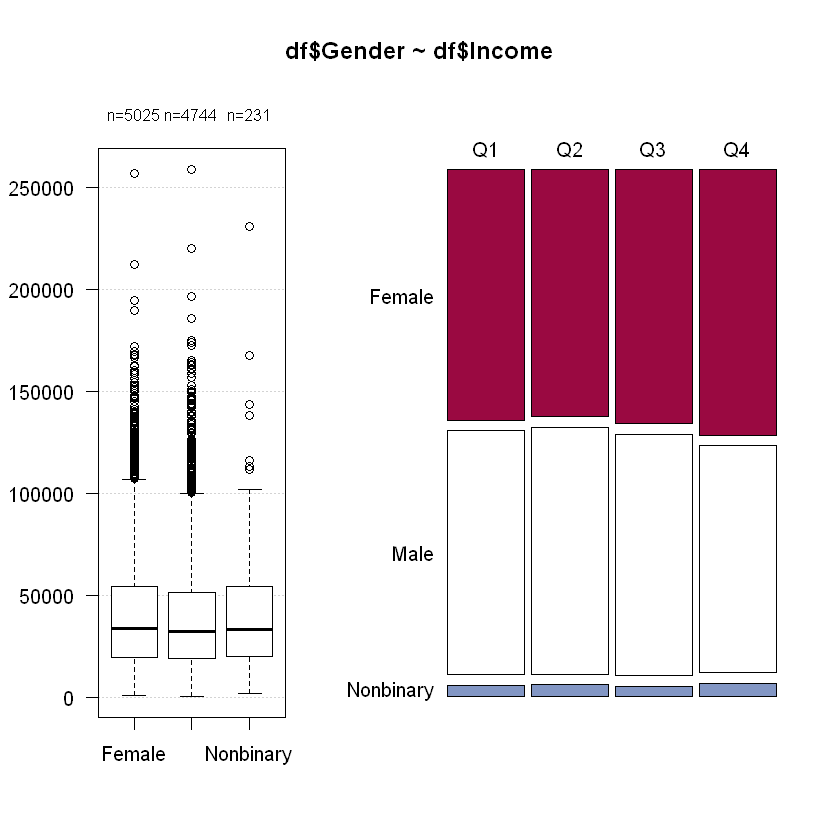

In [13]:
#Gender and income distribution [2]
Desc(df$Gender ~ df$Income)

There is little variability in distributions in income as it relates to gender. All three categorical answers have very similar means and IQR.

### E1. Results of Analysis

The Null Hypothesis for this experiment/analysis is that tenure is not linked to churn in a statistically significant way. The Alternative Hypothesis then is that there is a significant connection. Based on the results of the t-test, which produced a p-value of < 2.2e-16, shows that tenure affects churn with a > 95% confidence. Therefore we can reject the Null Hypothesis. Additionally, looking at the boxplot of churn and tenure, it is visually clear that the median and bulk of the customer churn occurs early into their tenure (<12 months). 

### E2. Limitations of Analysis

One potential limitation is the exclusion of analysing other variables. Tenure is likely a correlated variable to churn, but doesn't seem to be the cause of churn. If the analysis was continued with the rest of the variables in the data set, it might be possible to find one or a few that directly cause churn. Another limitation is a lack of specific actionable analysis. From what is shown above, one can draw some basic conclusions about tenure and churn, however further analysis could include forecasting of when a customer might leave. This might be more accurate, and could have a greater positive effect on customer retention. 

### E3. Recommended Course of Action

Looking at the results of the preceding analysis, it is clear that tenure has a strong relationship to churn rates. Because of this, I would recommend the company use more resources to focus on retaining customers that have been with them for less than approximately 12 months. This could include more targeted marketing, special promotions/pricing, or other incentives.

### G. Sources for Third-Party Code

1. (How to change the code "Yes" to 1 in an R data frame column?)https://www.tutorialspoint.com/how-to-change-the-code-yes-to-1-in-an-r-data-frame-column

2. (Describe Data)https://rdrr.io/cran/DescTools/man/Desc.html

3. (ggplot2 histogram plot : Quick start guide - R software and data visualization) http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization

### H. Sources

4. Bruce, Peter, et al. Practical Statistics for Data Scientists : 50+ Essential Concepts Using R and Python, O'Reilly Media, Incorporated, 2020. ProQuest Ebook Central, https://ebookcentral.proquest.com/lib/westerngovernors-ebooks/detail.action?docID=6173908.